In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
basedf = pd.read_csv('dataset/base_train_sum.csv')
moneydf = pd.read_csv('dataset/money_report_train_sum.csv')
patentdf = pd.read_csv('dataset/patent_train_sum.csv')
reportdf = pd.read_csv('dataset/year_report_train_sum.csv')


In [3]:
# fill NA in basedf
basedfNumric = basedf[['ID', '注册时间', '注册资本', '控制人持股比例']]
basedfNumric = basedfNumric.fillna(basedfNumric.mean())
basedf = pd.concat([basedfNumric,
                    pd.get_dummies(basedf['行业'], prefix='行业'),
                    pd.get_dummies(basedf['区域'], prefix='区域'),
                    pd.get_dummies(basedf['企业类型'], prefix='企业类型'),
                    pd.get_dummies(basedf['控制人类型'], prefix='控制人类型'),
                    basedf['flag']], axis=1)


In [4]:
# fill NA in patentdf
patentdf = pd.concat([patentdf['ID'], 
                      pd.get_dummies(patentdf['专利'], prefix='专利'), 
                      pd.get_dummies(patentdf['商标'], prefix='商标'), 
                      pd.get_dummies(patentdf['著作权'], prefix='著作权')], axis=1)


In [5]:
# fill NA in moneydf
# filling with quota-rate relationship
moneyCategories = {'债权融资': 0.08, '股权融资': 0.04, '内部融资和贸易融资': 0.06, '项目融资和政策融资': 0.06}
for c, rate in moneyCategories.items():
  quota = c+'额度'
  cost = c+'成本'
  quotaNull = moneydf[quota].isnull() & moneydf[cost].notnull()
  costNull = moneydf[quota].notnull() & moneydf[cost].isnull()
  moneydf.loc[quotaNull, quota] = moneydf.loc[quotaNull, cost] / rate
  moneydf.loc[costNull, cost] = moneydf.loc[costNull, quota] * rate
# others: use mode = 0
moneydf.iloc[:, 2:].fillna(0, inplace=True)
# fill NA in year by padding
moneydf.year = moneydf.year.fillna(method='pad')


In [6]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())


NameError: name 'sns' is not defined

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())


In [9]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\msyh.ttc',size=14)
sns.set(font=myfont.get_name())


In [10]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\msyh.ttc',size=10)
sns.set(font=myfont.get_name())


In [11]:
basedf.isnull().sum()

ID                 0
注册时间               0
注册资本               0
控制人持股比例            0
行业_交通运输业           0
行业_商业服务业           0
行业_工业              0
行业_服务业             0
行业_社区服务            0
行业_零售业             0
区域_山东              0
区域_广东              0
区域_广西              0
区域_江西              0
区域_湖北              0
区域_湖南              0
区域_福建              0
企业类型_农民专业合作社       0
企业类型_合伙企业          0
企业类型_有限责任公司        0
企业类型_股份有限公司        0
企业类型_集体所有制企业       0
控制人类型_企业法人         0
控制人类型_自然人          0
flag            9977
dtype: int64

In [12]:
patentdf.isnull().sum()

ID         0
专利_0.0     0
专利_1.0     0
商标_0.0     0
商标_1.0     0
著作权_0.0    0
著作权_1.0    0
dtype: int64

In [13]:
moneydf.isnull().sum()

ID             0
year           0
债权融资额度         6
债权融资成本         6
股权融资额度         7
股权融资成本         7
内部融资和贸易融资额度    4
内部融资和贸易融资成本    4
项目融资和政策融资额度    6
项目融资和政策融资成本    6
dtype: int64

In [14]:
moneydf.iloc[:, 2:] = moneydf.iloc[:, 2:].fillna(0)

In [15]:
moneydf.isnull().sum()

ID             0
year           0
债权融资额度         0
债权融资成本         0
股权融资额度         0
股权融资成本         0
内部融资和贸易融资额度    0
内部融资和贸易融资成本    0
项目融资和政策融资额度    0
项目融资和政策融资成本    0
dtype: int64

In [16]:
reportdf.isnull().sum()

ID           0
year       451
从业人数       428
资产总额       463
负债总额       445
营业总收入      487
主营业务收入     451
利润总额       429
净利润        484
纳税总额       417
所有者权益合计    429
dtype: int64

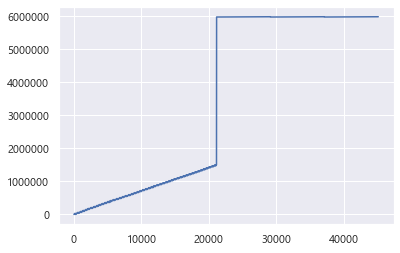

In [17]:
plt.plot(reportdf.ID)

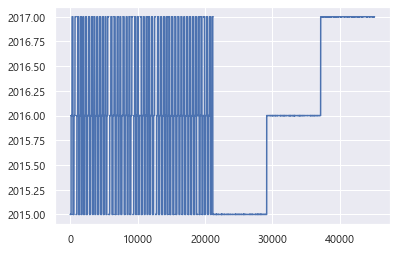

In [18]:
plt.plot(reportdf.year)

In [19]:
reportdf[reportdf.year.notnull()].groupby('ID').size().value_counts()

3    14602
2      445
1        3
dtype: int64

In [20]:
nonadf = reportdf
nonadf.year = nonadf.year.fillna(method='pad')
nonadf.groupby('ID').size().value_counts()

3    15050
dtype: int64

In [21]:
reportdf.isnull().sum()

ID           0
year         0
从业人数       428
资产总额       463
负债总额       445
营业总收入      487
主营业务收入     451
利润总额       429
净利润        484
纳税总额       417
所有者权益合计    429
dtype: int64

In [22]:
reportdf['从业人数'] = reportdf['从业人数'].fillna(method='mean')

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got mean

In [23]:
reportdf['从业人数'] = reportdf['从业人数'].fillna(reportdf['从业人数'].mean())

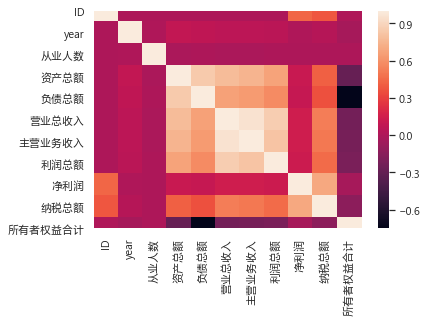

In [24]:
sns.heatmap(reportdf.corr())

In [25]:
reportdf = reportdf.drop('所有者权益合计', axis=1)

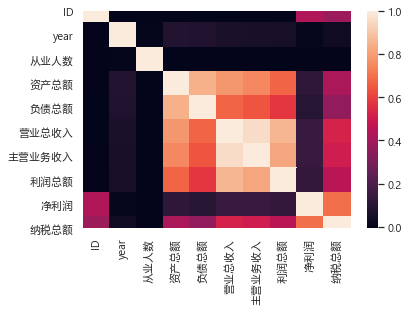

In [26]:
sns.heatmap(reportdf.corr())

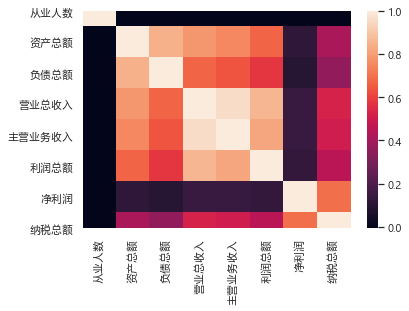

In [27]:
sns.heatmap(reportdf.iloc[:, 2:].corr())

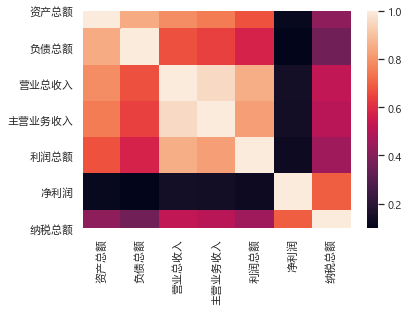

In [28]:
sns.heatmap(reportdf.iloc[:, 3:].corr())

In [29]:
reportdf.isnull().sum(axis=0).head()

ID        0
year      0
从业人数      0
资产总额    463
负债总额    445
dtype: int64

In [30]:
reportdf.isnull().sum(axis=1).head()

0    0
1    0
2    1
3    0
4    0
dtype: int64

In [31]:
reportdf.isnull().sum(axis=1).value_counts()

0    42053
1     3018
2       79
dtype: int64

In [32]:
reportdf.iloc[:, 1]

0        2015.0
1        2015.0
2        2015.0
3        2015.0
4        2015.0
          ...  
45145    2017.0
45146    2017.0
45147    2017.0
45148    2017.0
45149    2017.0
Name: year, Length: 45150, dtype: float64

In [33]:
ratedf = reportdf.iloc[:, 5:]
for i in range(1, ratedf.shape[1]):
    ratedf.iloc[:, i] /= ratedf.iloc[:, 0]

In [35]:
g = sns.pairplot(ratedf)

In [36]:
plt.show()

In [37]:
g

In [38]:
plt.show(g)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b70060cb38>)

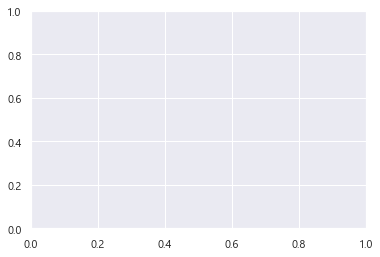

In [39]:
plt.subplots()

In [40]:
g

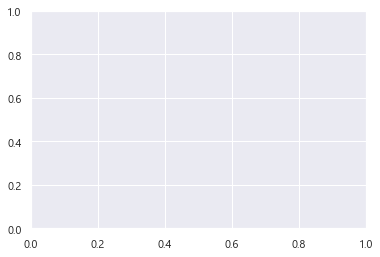

In [41]:
plt.subplots()
g

In [42]:
g
plt.show()

In [43]:
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

In [34]:
sns.pairplot(ratedf)

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [44]:
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

In [45]:
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B701656550>,
      dtype=object)

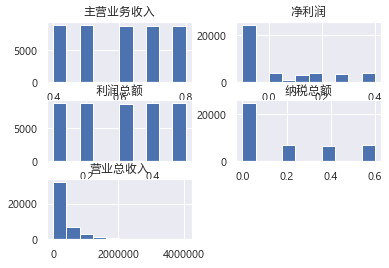

In [46]:
ratedf.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7463BF128>,
      dtype=object)

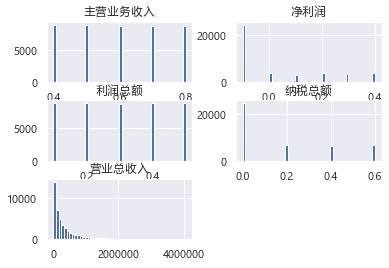

In [47]:
ratedf.hist(bins=50)

In [48]:
reportdf.isnull().sum()

ID          0
year        0
从业人数        0
资产总额      463
负债总额      445
营业总收入     487
主营业务收入    451
利润总额      429
净利润       484
纳税总额      417
dtype: int64

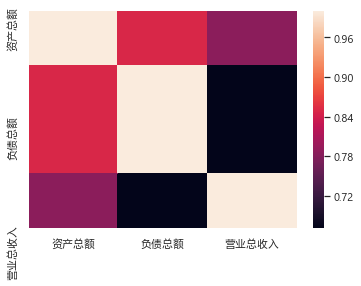

In [49]:
sns.heatmap(reportdf.iloc[:, 3:6].corr())

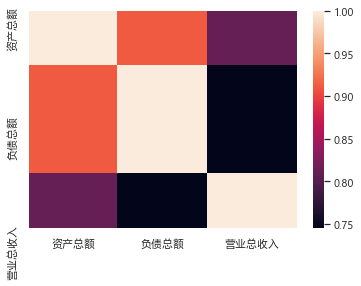

In [50]:
sns.heatmap(reportdf.iloc[:, 3:6].corr(method='spearman'))

In [51]:
plt.hist(reportdf['资产总额']/reportdf['负债总额'])

ValueError: supplied range of [0.5059523809523809, inf] is not finite

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7062DADD8>,
      dtype=object)

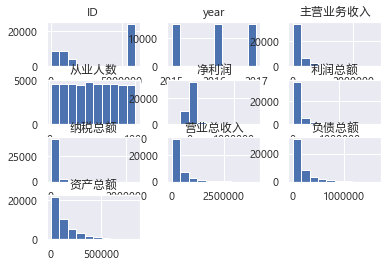

In [52]:
reportdf.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B706EAABA8>,
      dtype=object)

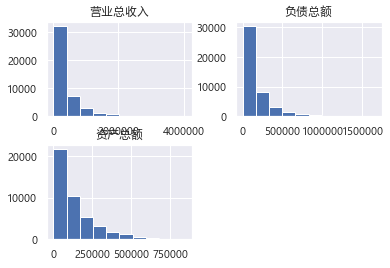

In [53]:
reportdf.iloc[:, 3:6].hist()

In [54]:
reportdf.iloc[:, 3:6].describe()

,资产总额,负债总额,营业总收入
count,44687.000000,4.470500e+04,4.466300e+04
mean,135728.099895,1.629924e+05,3.477351e+05
std,136351.253755,1.975744e+05,4.452355e+05
min,190.000000,0.000000e+00,1.000000e+02
25%,36240.000000,3.304000e+04,5.837700e+04
50%,89250.000000,9.129000e+04,1.785000e+05
75%,190560.000000,2.154600e+05,4.567500e+05
max,847450.000000,1.656480e+06,4.060875e+06


C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  200.,   643., 10504.,   635., 10520.,   661.,  2679.,  8023.,
         1428.,  8949.]),
 array([0.        , 0.19764706, 0.39529412, 0.59294118, 0.79058824,
        0.98823529, 1.18588235, 1.38352941, 1.58117647, 1.77882353,
        1.97647059]),
 <a list of 10 Patch objects>)

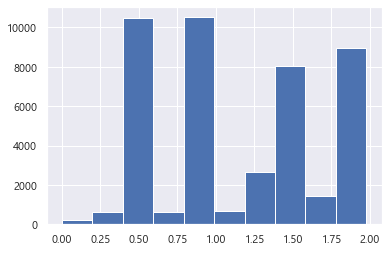

In [55]:
plt.hist(reportdf['负债总额']/reportdf['资产总额'])

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 200.,    0.,    0.,    0.,    0.,    0.,  155.,    0.,  214.,
         274.,  721., 3349., 6434.,    0.,    0.,    0.,  199.,    0.,
         436.,    0.,  196.,  543., 1184., 2295., 6302.,  377.,    0.,
           0.,  284.,    0.,  186.,  384.,  159.,  899., 1051., 1580.,
        3646., 2797.,    0.,    0.,  197.,    0.,  415.,  136.,  680.,
         522., 1010., 1200., 2415., 3802.]),
 array([0.        , 0.03952941, 0.07905882, 0.11858824, 0.15811765,
        0.19764706, 0.23717647, 0.27670588, 0.31623529, 0.35576471,
        0.39529412, 0.43482353, 0.47435294, 0.51388235, 0.55341176,
        0.59294118, 0.63247059, 0.672     , 0.71152941, 0.75105882,
        0.79058824, 0.83011765, 0.86964706, 0.90917647, 0.94870588,
        0.98823529, 1.02776471, 1.06729412, 1.10682353, 1.14635294,
        1.18588235, 1.22541176, 1.26494118, 1.30447059, 1.344     ,
        1.38352941, 1.42305882, 1.46258824, 1.50211765, 1.54164706,
        1.58117647, 1.62070588, 1.66023529, 1.69976471, 

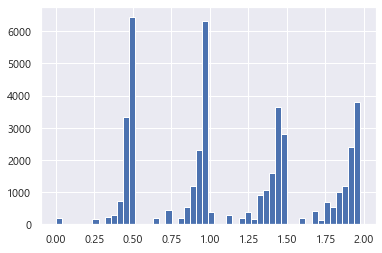

In [56]:
plt.hist(reportdf['负债总额']/reportdf['资产总额'], bins=50)

(array([7.996e+03, 6.253e+03, 4.913e+03, 3.845e+03, 3.135e+03, 2.598e+03,
        2.175e+03, 1.843e+03, 1.552e+03, 1.355e+03, 1.128e+03, 1.012e+03,
        8.780e+02, 7.550e+02, 6.040e+02, 5.690e+02, 5.090e+02, 4.270e+02,
        3.790e+02, 2.880e+02, 2.620e+02, 2.020e+02, 2.240e+02, 1.930e+02,
        1.760e+02, 1.620e+02, 1.170e+02, 1.120e+02, 8.800e+01, 9.200e+01,
        5.000e+01, 6.400e+01, 5.100e+01, 2.700e+01, 4.100e+01, 2.800e+01,
        2.800e+01, 1.900e+01, 1.600e+01, 9.000e+00, 1.300e+01, 1.100e+01,
        7.000e+00, 1.300e+01, 1.000e+01, 3.000e+00, 5.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00]),
 array([1.9000000e+02, 5.0077800e+04, 9.9965600e+04, 1.4985340e+05,
        1.9974120e+05, 2.4962900e+05, 2.9951680e+05, 3.4940460e+05,
        3.9929240e+05, 4.4918020e+05, 4.9906800e+05, 5.4895580e+05,
        5.9884360e+05, 6.4873140e+05, 6.9861920e+05, 7.4850700e+05,
        7.9839480e+05, 8.4828260e+05, 8.9817040e+05, 9.4805820e+05,
        9.9794600e+05, 1.0478338e+06

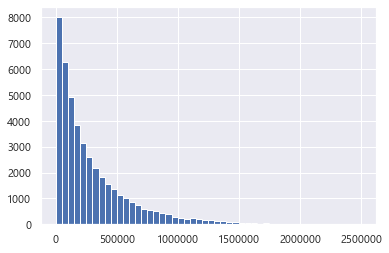

In [57]:
plt.hist(reportdf['负债总额'] + reportdf['资产总额'], bins=50)

(array([6.0000e+00, 1.2000e+01, 1.2000e+01, 3.8000e+01, 6.2000e+01,
        9.6000e+01, 1.0400e+02, 1.7700e+02, 2.5300e+02, 3.2100e+02,
        3.9900e+02, 5.7900e+02, 7.8200e+02, 1.0110e+03, 1.6380e+03,
        2.3930e+03, 1.5372e+04, 6.0740e+03, 3.5690e+03, 2.5260e+03,
        1.8780e+03, 1.4140e+03, 1.1100e+03, 8.5200e+02, 6.4600e+02,
        5.5200e+02, 4.5100e+02, 3.4400e+02, 2.9300e+02, 2.2500e+02,
        1.6400e+02, 1.5700e+02, 1.3300e+02, 1.1500e+02, 8.4000e+01,
        7.2000e+01, 6.4000e+01, 5.1000e+01, 4.4000e+01, 3.6000e+01,
        2.5000e+01, 2.5000e+01, 1.5000e+01, 1.6000e+01, 1.2000e+01,
        1.6000e+01, 1.3000e+01, 6.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([-419250. , -394497.4, -369744.8, -344992.2, -320239.6, -295487. ,
        -270734.4, -245981.8, -221229.2, -196476.6, -171724. , -146971.4,
        -122218.8,  -97466.2,  -72713.6,  -47961. ,  -23208.4,    1544.2,
          26296.8,   51049.4,   75802. ,  100554.6,  125307.2,  150059.8,
         174812.4,  19

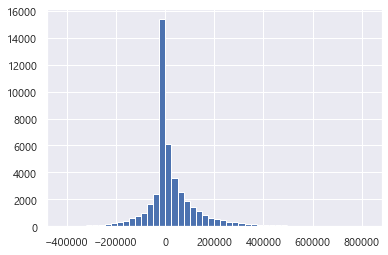

In [58]:
plt.hist(reportdf['负债总额'] - reportdf['资产总额'], bins=50)

(array([ 200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  155.,    0.,    0.,    0.,  214.,    0.,
         274.,    0.,  186.,  535., 1154., 2195., 6268.,  166.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  199.,    0.,    0.,
           0.,  436.,    0.,    0.,  196.,    0.,  385.,  158.,  667.,
         517., 1123., 1172., 2406., 3896.,  377.,    0.,    0.,    0.,
           0.,    0.,  284.,    0.,    0.,    0.,  186.,    0.,    0.,
         384.,    0.,  159.,  391.,  508.,  485.,  566.,  870.,  710.,
        1421., 2225., 2435.,  362.,    0.,    0.,    0.,    0.,  197.,
           0.,    0.,    0.,  415.,    0.,  136.,    0.,  393.,  287.,
           0.,  522.,  590.,  420.,  854.,  346., 1213., 1202., 1871.,
        1931.]),
 array([0.        , 0.01976471, 0.03952941, 0.05929412, 0.07905882,
        0.09882353, 0.11858824, 0.13835294, 0.15811765, 0.17788235,
        0.19764706, 0.21741176, 0.23717647, 0.25694118, 0.27670588

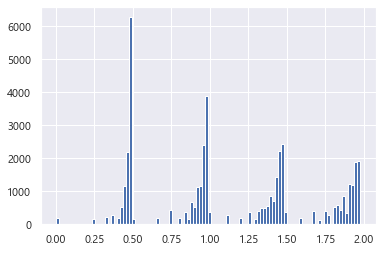

In [59]:
plt.hist(reportdf['负债总额']/reportdf['资产总额'], bins=100)

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6.9640e+03, 1.1858e+04, 8.7250e+03, 4.2900e+03, 2.7340e+03,
        1.4560e+03, 1.2910e+03, 8.6900e+02, 8.2300e+02, 6.0600e+02,
        3.3500e+02, 3.1000e+02, 5.3800e+02, 1.6100e+02, 2.7400e+02,
        1.4200e+02, 2.7600e+02, 8.1000e+01, 2.0500e+02, 1.3500e+02,
        2.1000e+01, 4.0000e+01, 9.7000e+01, 1.8100e+02, 5.0700e+02,
        2.1000e+01, 3.0000e+00, 0.0000e+00, 2.0000e+01, 1.5000e+01,
        3.4000e+01, 3.7000e+01, 8.7000e+01, 5.1000e+01, 2.1000e+01,
        4.3000e+01, 7.2000e+01, 6.5000e+01, 0.0000e+00, 0.0000e+00,
        1.1000e+01, 0.0000e+00, 1.1000e+01, 4.0000e+00, 3.2000e+01,
        2.2000e+01, 4.8000e+01, 3.9000e+01, 9.2000e+01, 1.5000e+02,
        1.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01, 0.0000e+00,
        6.0000e+00, 1.1000e+01, 1.1000e+01, 1.3000e+01, 1.1000e+01,
        1.6000e+01, 1.9000e+01, 2.5000e+01, 3.80

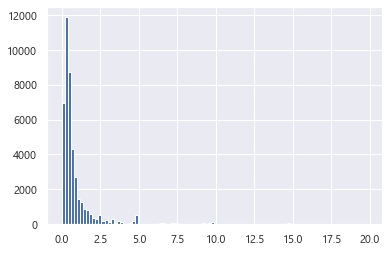

In [60]:
plt.hist(reportdf['负债总额']/reportdf['营业总收入'], bins=100)

(array([15128.,  7023.,  4380.,  3542.,  1770.,  1843.,   893.,   871.,
          933.,   852.,   840.,     0.,   853.,     0.,   857.,     0.,
            0.,     0.,   907.,     0.,     0.,     0.,     0.,   845.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,   882.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
          901.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,   883.]),
 array([ 0.2  ,  0.298,  0.396,  0.494,  0.592,  0.69 ,  0.788,  0.886,
         0.984,  1.082

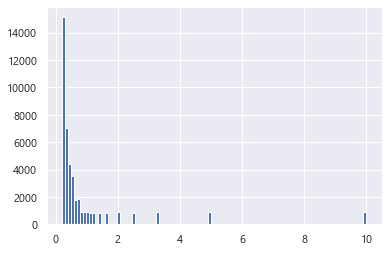

In [61]:
plt.hist(reportdf['资产总额']/reportdf['营业总收入'], bins=100)

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([883.,   0., 901.,   0., 882.,   0., 845.,   0., 907.,   0., 857.,
          0., 853.,   0., 840.,   0., 852.,   0., 933.,   0., 871.,   0.,
        893.,   0., 928.,   0., 915.,   0., 866.,   0., 904.,   0., 898.,
          0., 891.,   0., 880.,   0., 873.,   0., 857.,   0., 943.,   0.,
        877.,   0., 885.,   0., 818.,   0.,   0., 849.,   0., 817.,   0.,
        911.,   0., 885.,   0., 916.,   0., 852.,   0., 903.,   0., 890.,
          0., 909.,   0., 873.,   0., 890.,   0., 892.,   0., 928.,   0.,
        877.,   0., 906.,   0., 864.,   0., 956.,   0., 867.,   0., 917.,
          0., 887.,   0., 863.,   0., 884.,   0., 895.,   0., 831.,   0.,
        889.]),
 array([0.1  , 0.149, 0.198, 0.247, 0.296, 0.345, 0.394, 0.443, 0.492,
        0.541, 0.59 , 0.639, 0.688, 0.737, 0.786, 0.835, 0.884, 0.933,
        0.982, 1.031, 1.08 , 1.129, 1.178, 1.227, 1.276, 1.325, 1.374,
        1.423, 1.472, 1.521, 1.57 , 1.619, 1.668, 1.717, 1.766, 1.815,
        1.864, 1.913, 1.962, 2.011

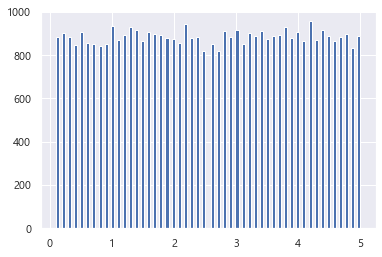

In [62]:
plt.hist(reportdf['营业总收入']/reportdf['资产总额'], bins=100)

In [63]:
plt.hist(reportdf['营业总收入']/reportdf['负债总额''], bins=100)

SyntaxError: EOL while scanning string literal (<ipython-input-63-0f2b81c90950>, line 1)

In [64]:
plt.hist(reportdf['营业总收入']/reportdf['负债总额'], bins=100)

ValueError: supplied range of [0.050595238095238096, inf] is not finite

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6.9640e+03, 1.1858e+04, 8.7250e+03, 4.2900e+03, 2.7340e+03,
        1.4560e+03, 1.2910e+03, 8.6900e+02, 8.2300e+02, 6.0600e+02,
        3.3500e+02, 3.1000e+02, 5.3800e+02, 1.6100e+02, 2.7400e+02,
        1.4200e+02, 2.7600e+02, 8.1000e+01, 2.0500e+02, 1.3500e+02,
        2.1000e+01, 4.0000e+01, 9.7000e+01, 1.8100e+02, 5.0700e+02,
        2.1000e+01, 3.0000e+00, 0.0000e+00, 2.0000e+01, 1.5000e+01,
        3.4000e+01, 3.7000e+01, 8.7000e+01, 5.1000e+01, 2.1000e+01,
        4.3000e+01, 7.2000e+01, 6.5000e+01, 0.0000e+00, 0.0000e+00,
        1.1000e+01, 0.0000e+00, 1.1000e+01, 4.0000e+00, 3.2000e+01,
        2.2000e+01, 4.8000e+01, 3.9000e+01, 9.2000e+01, 1.5000e+02,
        1.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01, 0.0000e+00,
        6.0000e+00, 1.1000e+01, 1.1000e+01, 1.3000e+01, 1.1000e+01,
        1.6000e+01, 1.9000e+01, 2.5000e+01, 3.80

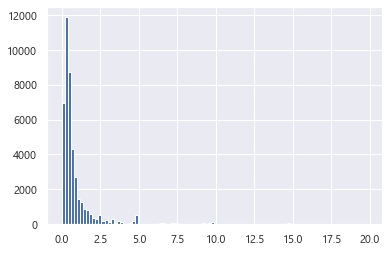

In [65]:
plt.hist(reportdf['负债总额']/reportdf['营业总收入'], bins=100)

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.149e+03, 2.024e+03, 1.988e+03, 2.052e+03, 1.981e+03, 2.027e+03,
        2.001e+03, 2.019e+03, 1.953e+03, 2.054e+03, 2.094e+03, 2.105e+03,
        1.975e+03, 1.373e+03, 1.349e+03, 1.220e+03, 1.193e+03, 9.750e+02,
        7.300e+02, 6.790e+02, 6.150e+02, 6.460e+02, 7.170e+02, 6.710e+02,
        6.160e+02, 5.350e+02, 3.740e+02, 2.980e+02, 2.440e+02, 2.450e+02,
        2.120e+02, 2.340e+02, 2.070e+02, 2.090e+02, 2.080e+02, 2.600e+02,
        1.900e+02, 2.280e+02, 2.000e+02, 2.120e+02, 2.210e+02, 2.270e+02,
        1.970e+02, 2.400e+02, 2.170e+02, 1.840e+02, 2.080e+02, 2.200e+02,
        1.840e+02, 1.930e+02, 1.890e+02, 1.440e+02, 9.500e+01, 9.700e+01,
        6.500e+01, 3.800e+01, 2.000e+01, 3.900e+01, 2.500e+01, 1.700e+01,
        0.000e+00, 1.500e+01, 1.000e+01, 6.000e+00, 3.000e+00, 1.400e+01,
        6.000e+00, 1.200e+01, 7.000e+00, 3.000e+00, 2.000e+00, 1.100e+01,
        0.000e+00, 6.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 4.000e+00, 0.000e+0

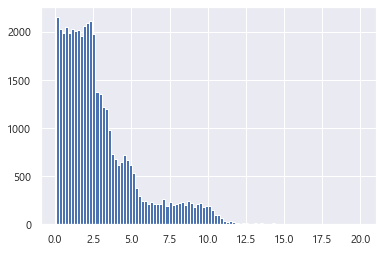

In [66]:
d = reportdf[reportdf['负债总额']!=0]
plt.hist(d['营业总收入']/d['负债总额'], bins=100)

In [67]:
reportdf = pd.read_csv('dataset/year_report_train_sum.csv')

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.3000e+01, 3.1000e+01, 3.5000e+01, 4.8000e+01, 1.4100e+02,
        4.6300e+02, 3.1090e+03, 8.2210e+03, 1.0552e+04, 6.2690e+03,
        5.2620e+03, 6.9800e+02, 6.6400e+02, 5.3100e+02, 5.0900e+02,
        4.8700e+02, 4.1500e+02, 4.7700e+02, 3.5000e+02, 3.8700e+02,
        3.1200e+02, 3.2900e+02, 2.9200e+02, 2.5900e+02, 2.6000e+02,
        2.1800e+02, 1.6900e+02, 1.7000e+02, 1.7700e+02, 1.7500e+02,
        1.7300e+02, 1.4400e+02, 1.3700e+02, 1.6400e+02, 1.1100e+02,
        1.2300e+02, 1.3300e+02, 1.2300e+02, 1.1600e+02, 7.8000e+01,
        8.5000e+01, 9.8000e+01, 8.4000e+01, 5.8000e+01, 7.6000e+01,
        6.5000e+01, 6.4000e+01, 5.9000e+01, 6.8000e+01, 5.7000e+01,
        5.7000e+01, 4.9000e+01, 5.6000e+01, 4.2000e+01, 4.4000e+01,
        3.3000e+01, 4.5000e+01, 3.6000e+01, 3.1000e+01, 3.3000e+01,
        3.7000e+01, 2.8000e+01, 3.1000e+01, 3.2000e+01, 2.1000e+01,
        1.7000e+01, 1.3000e+01, 2.3000e+01, 1.4000e+01, 2.3000e+01,
        1.6000e+01, 2.4000e+01, 8.0000e+00, 8.00

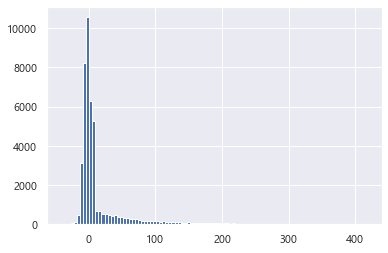

In [68]:
d = reportdf[reportdf['所有者权益合计']!=0]
plt.hist(d['营业总收入']/d['所有者权益合计'], bins=100)

(array([6.9640e+03, 1.1858e+04, 8.7250e+03, 4.2900e+03, 2.7340e+03,
        1.4560e+03, 1.2910e+03, 8.6900e+02, 8.2300e+02, 6.0600e+02,
        3.3500e+02, 3.1000e+02, 5.3800e+02, 1.6100e+02, 2.7400e+02,
        1.4200e+02, 2.7600e+02, 8.1000e+01, 2.0500e+02, 1.3500e+02,
        2.1000e+01, 4.0000e+01, 9.7000e+01, 1.8100e+02, 5.0700e+02,
        2.1000e+01, 3.0000e+00, 0.0000e+00, 2.0000e+01, 1.5000e+01,
        3.4000e+01, 3.7000e+01, 8.7000e+01, 5.1000e+01, 2.1000e+01,
        4.3000e+01, 7.2000e+01, 6.5000e+01, 0.0000e+00, 0.0000e+00,
        1.1000e+01, 0.0000e+00, 1.1000e+01, 4.0000e+00, 3.2000e+01,
        2.2000e+01, 4.8000e+01, 3.9000e+01, 9.2000e+01, 1.5000e+02,
        1.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01, 0.0000e+00,
        6.0000e+00, 1.1000e+01, 1.1000e+01, 1.3000e+01, 1.1000e+01,
        1.6000e+01, 1.9000e+01, 2.5000e+01, 3.80

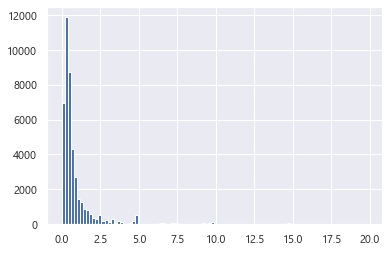

In [69]:
plt.hist(reportdf['负债总额']/reportdf['营业总收入'], bins=100)

(array([1.990e+02, 8.930e+02, 3.564e+03, 2.457e+03, 3.223e+03, 2.963e+03,
        3.028e+03, 2.827e+03, 3.000e+03, 2.233e+03, 1.964e+03, 1.419e+03,
        1.273e+03, 1.290e+03, 8.240e+02, 8.010e+02, 7.810e+02, 6.780e+02,
        5.730e+02, 6.100e+02, 4.470e+02, 4.570e+02, 3.450e+02, 3.210e+02,
        4.640e+02, 2.380e+02, 3.360e+02, 2.620e+02, 2.120e+02, 2.080e+02,
        1.950e+02, 1.980e+02, 4.450e+02, 8.800e+01, 8.700e+01, 1.780e+02,
        1.270e+02, 1.140e+02, 1.830e+02, 1.220e+02, 6.100e+01, 1.490e+02,
        8.700e+01, 1.000e+02, 2.500e+01, 9.000e+01, 9.600e+01, 1.460e+02,
        2.590e+02, 1.130e+02, 4.600e+01, 1.500e+01, 1.700e+01, 4.900e+01,
        4.400e+01, 1.110e+02, 5.500e+01, 4.400e+01, 6.400e+01, 3.600e+01,
        3.100e+01, 5.000e+01, 6.100e+01, 4.300e+01, 8.800e+01, 1.030e+02,
        4.200e+01, 8.000e+00, 1.600e+01, 9.000e+00, 3.800e+01, 4.000e+01,
        5.000e+01, 7.700e+01, 2.200e+01, 3.800e+01, 1.800e+01, 3.800e+01,
        6.400e+01, 3.000e+00, 2.100e+0

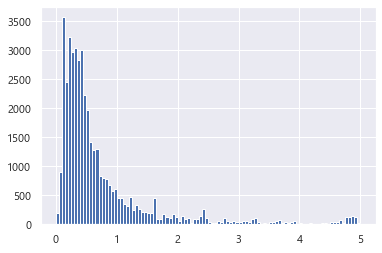

In [70]:
r = reportdf['负债总额']/reportdf['营业总收入']
plt.hist(r[r<=5], bins=100)

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  155.,    0.,    0.,    0.,  214.,    0.,
         274.,    0.,  186.,  535., 1154., 2195., 6268.,  166.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  199.,    0.,    0.,
           0.,  436.,    0.,    0.,  196.,    0.,  385.,  158.,  667.,
         517., 1123., 1172., 2406., 3896.,  377.,    0.,    0.,    0.,
           0.,    0.,  284.,    0.,    0.,    0.,  186.,    0.,    0.,
         384.,    0.,  159.,  391.,  508.,  485.,  566.,  870.,  710.,
        1421., 2225., 2435.,  362.,    0.,    0.,    0.,    0.,  197.,
           0.,    0.,    0.,  415.,    0.,  136.,    0.,  393.,  287.,
           0.,  522.,  590.,  420.,  854.,  346., 1213., 1202., 1871.,
        1931.]),
 array([0.        , 0.01976471, 0.03952941, 0.05929412, 0.07905882,
        0.09882353, 0.11858824, 0.13835294, 0.15811765, 0.17788235,
        0.19764706, 0.21741176, 0.23717647, 0.25694118, 0.27670588

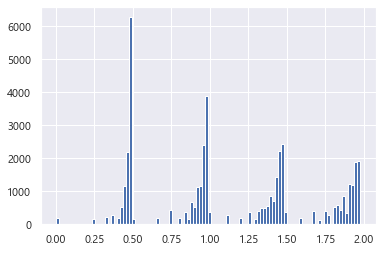

In [71]:
plt.hist(reportdf['负债总额']/reportdf['资产总额'], bins=100)

In [72]:
plt.hist(reportdf['资产总额']/reportdf['负债总额'], bins=100)

ValueError: supplied range of [0.5059523809523809, inf] is not finite

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7690., 1939.,  551.,  197., 1980., 5603., 1999.,  550.,  384.,
         186.,  284.,    0.,    0.,    0., 3807., 3244., 1923.,  817.,
         525.,  385.,    0.,  196.,    0.,  436.,    0.,    0.,    0.,
           0.,  199.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  121., 1999., 2905.,
        1409., 1123., 1072.,  148.,  640.,  366.,    0.,  153.,    0.,
         382.,    0.,    0.,  186.,    0.,    0.,    0.,  274.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  214.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         155.]),
 array([0.50595238, 0.54089286, 0.57583333, 0.61077381, 0.64571429,
        0.68065476, 0.71559524, 0.75053571, 0.78547619, 0.82041667,
        0.85535714, 0.89029762, 0.9252381 , 0.96017857, 0.99511905

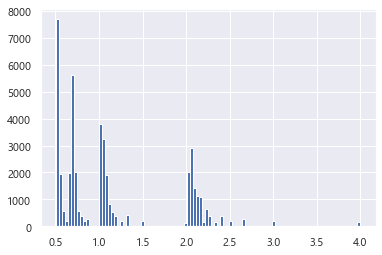

In [73]:
v = reportdf[reportdf['负债总额']!=0]
plt.hist(v['资产总额']/v['负债总额'], bins=100)

(array([ 200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  155.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  214.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  274.,    0.,    0.,    0.,    0.,  186.,
           0.,    0.,  382.,    0.,  153.,    0.,  366.,  263.,    0.,
         525.,  610.,  462.,  785.,  743.,  712., 1632., 1809., 1755.,
         121.]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.1

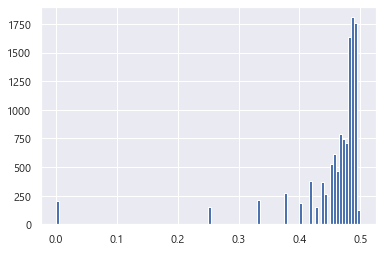

In [74]:
r = reportdf['负债总额']/reportdf['资产总额']
plt.hist(r[r<0.6], bins=100)

(array([ 200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  155.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  214.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  274.,    0.,    0.,    0.,    0.,  186.,
           0.,    0.,  382.,    0.,  153.,    0.,  366.,  263.,    0.,
         525.,  610.,  462.,  785.,  743.,  712., 1632., 1809., 1755.,
         121.]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.1

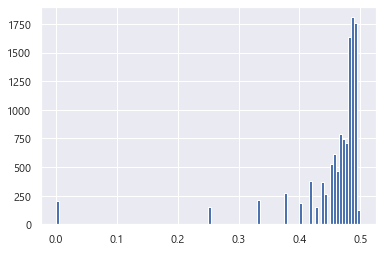

In [75]:
r = reportdf['负债总额']/reportdf['资产总额']
plt.hist(r[r<=0.5], bins=100)

In [76]:
r = reportdf['负债总额']/reportdf['资产总额']
plt.hist(r[r<=0.5&r>=0.25], bins=200)

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [77]:
r = reportdf['负债总额']/reportdf['资产总额']
plt.hist(r[r<=0.5&&r>=0.25], bins=200)

SyntaxError: invalid syntax (<ipython-input-77-9357eadfefd3>, line 2)

In [78]:
r = reportdf['负债总额']/reportdf['资产总额']
plt.hist(r[r<=0.5 & r>=0.25], bins=200)

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

(array([155.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        214.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 274.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 186.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 382.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 153.,
          0.,   0.,   0.,   0.,   0., 

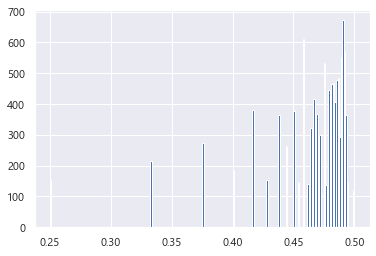

In [79]:
r = reportdf['负债总额']/reportdf['资产总额']
plt.hist(r[(r<=0.5) & (r>=0.25)], bins=200)

(array([ 155.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  214.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  274.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  186.,    0.,    0.,
           0.,    0.,    0.,  382.,    0.,    0.,    0.,    0.,  153.,
           0.,    0.,    0.,  366.,    0.,  263.,    0.,    0.,  377.,
         148.,    0.,  610.,  140.,  322.,  417.,  368.,  338.,    0.,
         671.,  446.,  757.,  875.,  961.,  848., 1243.,  512.,    0.,
         121.]),
 array([0.25  , 0.2525, 0.255 , 0.2575, 0.26  , 0.2625, 0.265 , 0.2675,
        0.27  , 0.2725, 0.275 , 0.2775, 0.28  , 0.2825, 0.285 , 0.2875,
        0.29  , 0.2925, 0.295 , 0.2975, 0.3   , 0.3025, 0.

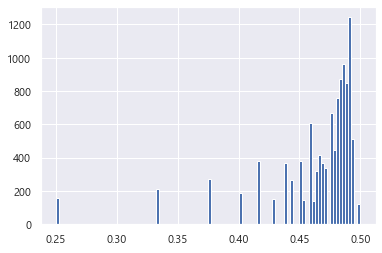

In [80]:
r = reportdf['负债总额']/reportdf['资产总额']
plt.hist(r[(r<=0.5) & (r>=0.25)], bins=100)

In [81]:
r = reportdf['负债总额']/reportdf['资产总额']
r[r<=0.5].value_counts()

0.458333    610
0.483333    467
0.479167    446
0.466667    417
0.475000    405
0.416667    382
0.450000    377
0.468750    368
0.437500    366
0.464286    322
0.487500    320
0.488889    310
0.482143    309
0.491667    302
0.472222    300
0.486111    277
0.375000    274
0.484375    267
0.444444    263
0.489583    244
0.333333    214
0.000000    200
0.400000    186
0.492308    165
0.491071    164
0.487179    163
0.490385    162
0.490000    161
0.493333    160
0.488095    158
0.481481    156
0.250000    155
0.485714    154
0.492857    154
0.428571    153
0.480000    150
0.454545    148
0.490909    145
0.480769    142
0.484848    141
0.461538    140
0.477273    137
0.488636    136
0.476190    129
0.500000    121
0.492188    104
0.493750    101
0.492647     52
0.485294     47
0.494118     45
0.490196     40
0.470588     38
dtype: int64

In [82]:
r = reportdf['负债总额']/reportdf['资产总额']
r[r<=0.5].value_counts().sort()

AttributeError: 'Series' object has no attribute 'sort'

In [83]:
r = reportdf['负债总额']/reportdf['资产总额']
r[r<=0.5].value_counts().sort_values()

0.470588     38
0.490196     40
0.494118     45
0.485294     47
0.492647     52
0.493750    101
0.492188    104
0.500000    121
0.476190    129
0.488636    136
0.477273    137
0.461538    140
0.484848    141
0.480769    142
0.490909    145
0.454545    148
0.480000    150
0.428571    153
0.492857    154
0.485714    154
0.250000    155
0.481481    156
0.488095    158
0.493333    160
0.490000    161
0.490385    162
0.487179    163
0.491071    164
0.492308    165
0.400000    186
0.000000    200
0.333333    214
0.489583    244
0.444444    263
0.484375    267
0.375000    274
0.486111    277
0.472222    300
0.491667    302
0.482143    309
0.488889    310
0.487500    320
0.464286    322
0.437500    366
0.468750    368
0.450000    377
0.416667    382
0.475000    405
0.466667    417
0.479167    446
0.483333    467
0.458333    610
dtype: int64

In [84]:
r = reportdf['负债总额']/reportdf['资产总额']
r[r<=0.5].value_counts().sort_index()

0.000000    200
0.250000    155
0.333333    214
0.375000    274
0.400000    186
0.416667    382
0.428571    153
0.437500    366
0.444444    263
0.450000    377
0.454545    148
0.458333    610
0.461538    140
0.464286    322
0.466667    417
0.468750    368
0.470588     38
0.472222    300
0.475000    405
0.476190    129
0.477273    137
0.479167    446
0.480000    150
0.480769    142
0.481481    156
0.482143    309
0.483333    467
0.484375    267
0.484848    141
0.485294     47
0.485714    154
0.486111    277
0.487179    163
0.487500    320
0.488095    158
0.488636    136
0.488889    310
0.489583    244
0.490000    161
0.490196     40
0.490385    162
0.490909    145
0.491071    164
0.491667    302
0.492188    104
0.492308    165
0.492647     52
0.492857    154
0.493333    160
0.493750    101
0.494118     45
0.500000    121
dtype: int64

In [85]:
reportdf[reportdf.isnull().T.any()]

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
2,429,2015.0,136.0,193400.0,183730.0,502840.0,351988.0,NaN,-50284.0,0.0,9670.0
6,1137,2015.0,289.0,NaN,40320.0,81536.0,57075.2,32614.4,-8153.6,0.0,-11200.0
28,7662,2015.0,455.0,470000.0,921200.0,1175000.0,NaN,235000.0,-117500.0,0.0,-451200.0
31,7865,2015.0,753.0,476300.0,935280.0,2333870.0,NaN,933548.0,-233387.0,0.0,-458980.0
37,8872,2015.0,NaN,621600.0,612720.0,1243200.0,497280.0,621600.0,-124320.0,0.0,8880.0
...,...,...,...,...,...,...,...,...,...,...,...
45094,5977978,2017.0,95.0,124740.0,178605.0,349272.0,244490.4,34927.2,69854.4,NaN,-53865.0
45103,5977987,2017.0,632.0,3600.0,3500.0,NaN,2736.0,684.0,684.0,2736.0,100.0
45112,5977996,2017.0,NaN,499200.0,734400.0,2296320.0,918528.0,229632.0,229632.0,918528.0,-235200.0
45122,5978006,2017.0,190.0,82650.0,38570.0,289275.0,NaN,115710.0,28927.5,115710.0,44080.0


In [86]:
type(basedf)

pandas.core.frame.DataFrame

In [87]:
t = pd.read_csv('dataset/base_train_sum.csv')

In [88]:
type(t)

pandas.core.frame.DataFrame

In [89]:
t

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,28,2007.0,2050.0,交通运输业,福建,农民专业合作社,企业法人,NaN,1.0
1,230,2008.0,3360.0,服务业,广东,农民专业合作社,企业法人,1.00,1.0
2,429,2005.0,9670.0,工业,江西,集体所有制企业,自然人,0.75,1.0
3,693,2011.0,8360.0,社区服务,山东,股份有限公司,企业法人,0.98,1.0
4,727,2001.0,8720.0,零售业,江西,股份有限公司,企业法人,0.54,1.0
...,...,...,...,...,...,...,...,...,...
15045,5978029,2014.0,460.0,交通运输业,广西,农民专业合作社,企业法人,0.71,NaN
15046,5978030,2004.0,1140.0,商业服务业,湖南,有限责任公司,自然人,0.95,NaN
15047,5978031,2008.0,3290.0,交通运输业,湖南,集体所有制企业,自然人,0.63,NaN
15048,5978032,2009.0,6060.0,工业,福建,农民专业合作社,企业法人,0.51,NaN


In [90]:
t['ID']

0             28
1            230
2            429
3            693
4            727
          ...   
15045    5978029
15046    5978030
15047    5978031
15048    5978032
15049    5978033
Name: ID, Length: 15050, dtype: int64

In [91]:
t[0]

KeyError: 0

In [92]:
t['0']

KeyError: '0'

In [93]:
t['ID']

0             28
1            230
2            429
3            693
4            727
          ...   
15045    5978029
15046    5978030
15047    5978031
15048    5978032
15049    5978033
Name: ID, Length: 15050, dtype: int64

In [94]:
type(t.ID)

pandas.core.series.Series

In [95]:
t.head()

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,28,2007.0,2050.0,交通运输业,福建,农民专业合作社,企业法人,NaN,1.0
1,230,2008.0,3360.0,服务业,广东,农民专业合作社,企业法人,1.00,1.0
2,429,2005.0,9670.0,工业,江西,集体所有制企业,自然人,0.75,1.0
3,693,2011.0,8360.0,社区服务,山东,股份有限公司,企业法人,0.98,1.0
4,727,2001.0,8720.0,零售业,江西,股份有限公司,企业法人,0.54,1.0


In [96]:
t.dtypes

ID           int64
注册时间       float64
注册资本       float64
行业          object
区域          object
企业类型        object
控制人类型       object
控制人持股比例    float64
flag       float64
dtype: object

In [97]:
t.describe()

,ID,注册时间,注册资本,控制人持股比例,flag
count,1.505000e+04,14879.000000,14909.000000,14911.000000,5073.0
mean,3.527931e+06,2006.898515,5003.630693,0.755561,1.0
std,2.622221e+06,4.311774,2873.938399,0.144000,0.0
min,2.800000e+01,2000.000000,100.000000,0.510000,1.0
25%,8.036028e+05,2003.000000,2500.000000,0.630000,1.0
50%,5.970482e+06,2007.000000,4980.000000,0.760000,1.0
75%,5.974260e+06,2011.000000,7510.000000,0.880000,1.0
max,5.978033e+06,2014.000000,10000.000000,1.000000,1.0


In [98]:
patentdf.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [99]:
patentdf.describe()

,ID,专利_0.0,专利_1.0,商标_0.0,商标_1.0,著作权_0.0,著作权_1.0
count,1.505000e+04,15050.000000,15050.000000,15050.000000,15050.000000,15050.000000,15050.000000
mean,3.527931e+06,0.644983,0.344983,0.636611,0.353090,0.626711,0.364053
std,2.622221e+06,0.478534,0.475379,0.480991,0.477946,0.483694,0.481180
min,2.800000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.036028e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.970482e+06,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,5.974260e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.978033e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
basedf = pd.read_csv('dataset/base_train_sum.csv')
moneydf = pd.read_csv('dataset/money_report_train_sum.csv')
patentdf = pd.read_csv('dataset/patent_train_sum.csv')
reportdf = pd.read_csv('dataset/year_report_train_sum.csv')


In [101]:
patentdf.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [102]:
patentdf.describe()

,ID,专利,商标,著作权
count,1.505000e+04,14899.000000,14895.000000,14911.000000
mean,3.527931e+06,0.348480,0.356764,0.367447
std,2.622221e+06,0.476505,0.479060,0.482126
min,2.800000e+01,0.000000,0.000000,0.000000
25%,8.036028e+05,0.000000,0.000000,0.000000
50%,5.970482e+06,0.000000,0.000000,0.000000
75%,5.974260e+06,1.000000,1.000000,1.000000
max,5.978033e+06,1.000000,1.000000,1.000000


In [103]:
patentdf.专利

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
15045    1.0
15046    0.0
15047    0.0
15048    1.0
15049    0.0
Name: 专利, Length: 15050, dtype: float64

In [104]:
patentdf.专利.value_counts()

0.0    9707
1.0    5192
Name: 专利, dtype: int64

In [105]:
basedf.head()

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,28,2007.0,2050.0,交通运输业,福建,农民专业合作社,企业法人,NaN,1.0
1,230,2008.0,3360.0,服务业,广东,农民专业合作社,企业法人,1.00,1.0
2,429,2005.0,9670.0,工业,江西,集体所有制企业,自然人,0.75,1.0
3,693,2011.0,8360.0,社区服务,山东,股份有限公司,企业法人,0.98,1.0
4,727,2001.0,8720.0,零售业,江西,股份有限公司,企业法人,0.54,1.0


In [106]:
basedf.describe()

,ID,注册时间,注册资本,控制人持股比例,flag
count,1.505000e+04,14879.000000,14909.000000,14911.000000,5073.0
mean,3.527931e+06,2006.898515,5003.630693,0.755561,1.0
std,2.622221e+06,4.311774,2873.938399,0.144000,0.0
min,2.800000e+01,2000.000000,100.000000,0.510000,1.0
25%,8.036028e+05,2003.000000,2500.000000,0.630000,1.0
50%,5.970482e+06,2007.000000,4980.000000,0.760000,1.0
75%,5.974260e+06,2011.000000,7510.000000,0.880000,1.0
max,5.978033e+06,2014.000000,10000.000000,1.000000,1.0


In [107]:
basedf.行业.value_counts()

商业服务业    2550
社区服务     2493
服务业      2477
交通运输业    2475
工业       2457
零售业      2455
Name: 行业, dtype: int64

In [108]:
basedf.区域.value_counts()

广西    2203
江西    2186
福建    2160
湖北    2117
山东    2109
广东    2072
湖南    2063
Name: 区域, dtype: int64

In [109]:
plt.hist(basedf.行业)

TypeError: nan is not a string

(array([2475.,    0., 2477.,    0., 2457.,    0., 2493.,    0., 2455.,
        2550.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

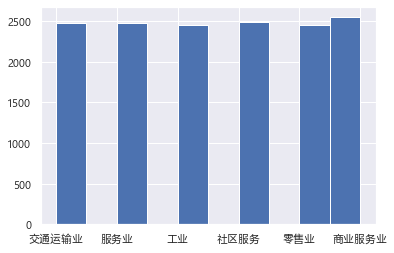

In [110]:
plt.hist(basedf.行业[basedf.行业.notnull()])

(array([3043.,    0., 2957.,    0.,    0., 2985.,    0., 3022.,    0.,
        2898.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

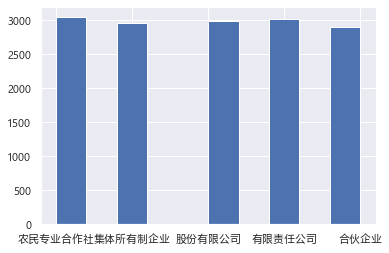

In [111]:
plt.hist(basedf.企业类型[basedf.企业类型.notnull()])

In [112]:
basedf

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,28,2007.0,2050.0,交通运输业,福建,农民专业合作社,企业法人,NaN,1.0
1,230,2008.0,3360.0,服务业,广东,农民专业合作社,企业法人,1.00,1.0
2,429,2005.0,9670.0,工业,江西,集体所有制企业,自然人,0.75,1.0
3,693,2011.0,8360.0,社区服务,山东,股份有限公司,企业法人,0.98,1.0
4,727,2001.0,8720.0,零售业,江西,股份有限公司,企业法人,0.54,1.0
...,...,...,...,...,...,...,...,...,...
15045,5978029,2014.0,460.0,交通运输业,广西,农民专业合作社,企业法人,0.71,NaN
15046,5978030,2004.0,1140.0,商业服务业,湖南,有限责任公司,自然人,0.95,NaN
15047,5978031,2008.0,3290.0,交通运输业,湖南,集体所有制企业,自然人,0.63,NaN
15048,5978032,2009.0,6060.0,工业,福建,农民专业合作社,企业法人,0.51,NaN


In [113]:
moneydf

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,28,2015.0,0.0,0.0,0.00,0.0000,21648.0,1298.880,0.0,0.000
1,230,2015.0,0.0,0.0,0.00,0.0000,0.0,0.000,470.4,28.224
2,429,2015.0,19340.0,1547.2,0.00,0.0000,0.0,0.000,0.0,0.000
3,693,2015.0,0.0,0.0,0.00,0.0000,0.0,0.000,5350.4,321.024
4,727,2015.0,0.0,0.0,32229.12,1289.1648,0.0,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
45145,5978029,2017.0,0.0,0.0,0.00,0.0000,1117.8,67.068,0.0,0.000
45146,5978030,2017.0,0.0,0.0,0.00,0.0000,0.0,0.000,2371.2,142.272
45147,5978031,2017.0,0.0,0.0,0.00,0.0000,0.0,0.000,2664.9,159.894
45148,5978032,2017.0,0.0,0.0,0.00,0.0000,0.0,0.000,2908.8,174.528


In [114]:
moneydf.year.value_counts()

2017.0    14917
2015.0    14904
2016.0    14897
Name: year, dtype: int64

In [115]:
moneydf.sort_values('ID')

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,28,2015.0,0.0,0.00,0.00,0.0000,21648.0,1298.880,0.0,0.000
270,28,2017.0,0.0,0.00,3444.00,137.7600,0.0,0.000,0.0,0.000
135,28,2016.0,0.0,0.00,34686.00,1387.4400,0.0,0.000,0.0,0.000
1,230,2015.0,0.0,0.00,0.00,0.0000,0.0,0.000,470.4,28.224
271,230,2017.0,0.0,0.00,3024.00,120.9600,0.0,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
29148,5978032,2015.0,0.0,0.00,25524.72,1020.9888,0.0,0.000,0.0,0.000
37148,5978032,2016.0,12726.0,1018.08,0.00,0.0000,0.0,0.000,0.0,0.000
37149,5978033,2016.0,0.0,0.00,0.00,0.0000,254318.4,15259.104,0.0,0.000
29149,5978033,2015.0,18096.0,1447.68,0.00,0.0000,0.0,0.000,0.0,0.000


In [116]:
moneydf.sort_values(['ID', 'year'])

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,28,2015.0,0.0,0.00,0.0,0.00,21648.0,1298.880,0.0,0.000
135,28,2016.0,0.0,0.00,34686.0,1387.44,0.0,0.000,0.0,0.000
270,28,2017.0,0.0,0.00,3444.0,137.76,0.0,0.000,0.0,0.000
1,230,2015.0,0.0,0.00,0.0,0.00,0.0,0.000,470.4,28.224
136,230,2016.0,0.0,0.00,0.0,0.00,46771.2,2806.272,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
37148,5978032,2016.0,12726.0,1018.08,0.0,0.00,0.0,0.000,0.0,0.000
45148,5978032,2017.0,0.0,0.00,0.0,0.00,0.0,0.000,2908.8,174.528
29149,5978033,2015.0,18096.0,1447.68,0.0,0.00,0.0,0.000,0.0,0.000
37149,5978033,2016.0,0.0,0.00,0.0,0.00,254318.4,15259.104,0.0,0.000


In [117]:
moneydf

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,28,2015.0,0.0,0.0,0.00,0.0000,21648.0,1298.880,0.0,0.000
1,230,2015.0,0.0,0.0,0.00,0.0000,0.0,0.000,470.4,28.224
2,429,2015.0,19340.0,1547.2,0.00,0.0000,0.0,0.000,0.0,0.000
3,693,2015.0,0.0,0.0,0.00,0.0000,0.0,0.000,5350.4,321.024
4,727,2015.0,0.0,0.0,32229.12,1289.1648,0.0,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
45145,5978029,2017.0,0.0,0.0,0.00,0.0000,1117.8,67.068,0.0,0.000
45146,5978030,2017.0,0.0,0.0,0.00,0.0000,0.0,0.000,2371.2,142.272
45147,5978031,2017.0,0.0,0.0,0.00,0.0000,0.0,0.000,2664.9,159.894
45148,5978032,2017.0,0.0,0.0,0.00,0.0000,0.0,0.000,2908.8,174.528


In [118]:
moneydf.债权融资额度.value_counts()

0.0        33622
720.0         13
5940.0        12
7200.0        12
1260.0        11
           ...  
4700.0         1
6710.0         1
7111.0         1
23584.0        1
11772.0        1
Name: 债权融资额度, Length: 6468, dtype: int64

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.9021e+04, 2.5760e+03, 1.3420e+03, 7.5800e+02, 4.3500e+02,
        2.8300e+02, 1.5900e+02, 7.7000e+01, 4.4000e+01, 8.0000e+00]),
 array([    0. ,  8474.5, 16949. , 25423.5, 33898. , 42372.5, 50847. ,
        59321.5, 67796. , 76270.5, 84745. ]),
 <a list of 10 Patch objects>)

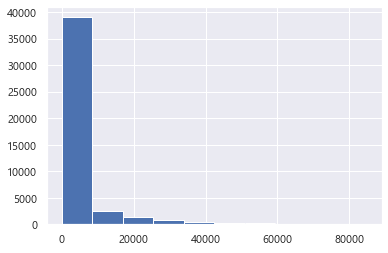

In [119]:
plt.hist(moneydf.债权融资额度)

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.4984e+04, 1.2840e+03, 1.0630e+03, 8.8900e+02, 8.0100e+02,
        6.8100e+02, 5.8100e+02, 4.8900e+02, 4.6400e+02, 3.6100e+02,
        3.1100e+02, 2.9400e+02, 2.6300e+02, 2.6200e+02, 2.1200e+02,
        1.9000e+02, 1.5800e+02, 1.4900e+02, 1.4300e+02, 1.1800e+02,
        1.0000e+02, 9.3000e+01, 9.3000e+01, 8.0000e+01, 6.9000e+01,
        8.0000e+01, 6.6000e+01, 5.2000e+01, 4.2000e+01, 4.3000e+01,
        3.5000e+01, 3.5000e+01, 3.6000e+01, 2.2000e+01, 3.1000e+01,
        2.2000e+01, 1.9000e+01, 1.1000e+01, 1.4000e+01, 1.1000e+01,
        1.5000e+01, 9.0000e+00, 8.0000e+00, 7.0000e+00, 5.0000e+00,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([    0. ,  1694.9,  3389.8,  5084.7,  6779.6,  8474.5, 10169.4,
        11864.3, 13559.2, 15254.1, 16949. , 18643.9, 20338.8, 22033.7,
        23728.6, 25423.5, 27118.4, 28813.3, 30508.2, 32203.1, 33898. ,
        35592.9, 37287.8, 38982.7, 40677.6, 42372.5, 44067.4, 45762.3,
        47457.2, 49152.1, 50847. ,

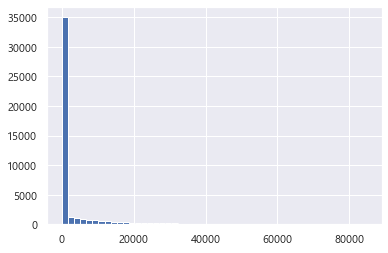

In [120]:
plt.hist(moneydf.债权融资额度, bins=50)

In [121]:
head(basedf)

NameError: name 'head' is not defined

In [122]:
basedf.head()

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,28,2007.0,2050.0,交通运输业,福建,农民专业合作社,企业法人,NaN,1.0
1,230,2008.0,3360.0,服务业,广东,农民专业合作社,企业法人,1.00,1.0
2,429,2005.0,9670.0,工业,江西,集体所有制企业,自然人,0.75,1.0
3,693,2011.0,8360.0,社区服务,山东,股份有限公司,企业法人,0.98,1.0
4,727,2001.0,8720.0,零售业,江西,股份有限公司,企业法人,0.54,1.0


In [123]:
basedf.isnull()

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15045,False,False,False,False,False,False,False,False,True
15046,False,False,False,False,False,False,False,False,True
15047,False,False,False,False,False,False,False,False,True
15048,False,False,False,False,False,False,False,False,True


In [124]:
basedf.isnull().dtypes

ID         bool
注册时间       bool
注册资本       bool
行业         bool
区域         bool
企业类型       bool
控制人类型      bool
控制人持股比例    bool
flag       bool
dtype: object

In [125]:
basedf == np.NaN

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15045,False,False,False,False,False,False,False,False,False
15046,False,False,False,False,False,False,False,False,False
15047,False,False,False,False,False,False,False,False,False
15048,False,False,False,False,False,False,False,False,False


In [126]:
basedf != 0

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
15045,True,True,True,True,True,True,True,True,True
15046,True,True,True,True,True,True,True,True,True
15047,True,True,True,True,True,True,True,True,True
15048,True,True,True,True,True,True,True,True,True


In [127]:
s = basedf.控制人持股比例

In [128]:
type(s)

pandas.core.series.Series

In [129]:
s.isnull()

0         True
1        False
2        False
3        False
4        False
         ...  
15045    False
15046    False
15047    False
15048    False
15049    False
Name: 控制人持股比例, Length: 15050, dtype: bool

In [130]:
basedf['控制人持股比例']

0         NaN
1        1.00
2        0.75
3        0.98
4        0.54
         ... 
15045    0.71
15046    0.95
15047    0.63
15048    0.51
15049    0.63
Name: 控制人持股比例, Length: 15050, dtype: float64

In [131]:
s.isnull()

0         True
1        False
2        False
3        False
4        False
         ...  
15045    False
15046    False
15047    False
15048    False
15049    False
Name: 控制人持股比例, Length: 15050, dtype: bool

In [132]:
s == np.NaN

0        False
1        False
2        False
3        False
4        False
         ...  
15045    False
15046    False
15047    False
15048    False
15049    False
Name: 控制人持股比例, Length: 15050, dtype: bool

In [133]:
s == pd.NaN

AttributeError: module 'pandas' has no attribute 'NaN'

In [134]:
s.isnull()

0         True
1        False
2        False
3        False
4        False
         ...  
15045    False
15046    False
15047    False
15048    False
15049    False
Name: 控制人持股比例, Length: 15050, dtype: bool

In [135]:
s

0         NaN
1        1.00
2        0.75
3        0.98
4        0.54
         ... 
15045    0.71
15046    0.95
15047    0.63
15048    0.51
15049    0.63
Name: 控制人持股比例, Length: 15050, dtype: float64

In [136]:
r = reportdf['负债总额']/reportdf['资产总额']
(0.5 - r[r<=0.5]).value_counts().sort_index()

0.000000    121
0.005882     45
0.006250    101
0.006667    160
0.007143    154
0.007353     52
0.007692    165
0.007812    104
0.008333    302
0.008929    164
0.009091    145
0.009615    162
0.009804     40
0.010000    161
0.010417    244
0.011111    310
0.011364    136
0.011905    158
0.012500    320
0.012821    163
0.013889    277
0.014286    154
0.014706     47
0.015152    141
0.015625    267
0.016667    467
0.017857    309
0.018519    156
0.019231    142
0.020000    150
0.020833    446
0.022727    137
0.023810    129
0.025000    405
0.027778    300
0.029412     38
0.031250    368
0.033333    417
0.035714    322
0.038462    140
0.041667    610
0.045455    148
0.050000    377
0.055556    263
0.062500    366
0.071429    153
0.083333    382
0.100000    186
0.125000    274
0.166667    214
0.250000    155
0.500000    200
dtype: int64

In [137]:
r = reportdf['负债总额']/reportdf['资产总额']
i = (0.5 - r[r<=0.5]).value_counts().sort_index().index

In [138]:
from fractions import Fraction

In [139]:
i

Float64Index([                  0.0,   0.00588235294117645,
               0.006249999999999978,  0.006666666666666654,
              0.0071428571428571175,  0.007352941176470562,
               0.007692307692307665,             0.0078125,
                0.00833333333333336,  0.008928571428571452,
               0.009090909090909094,  0.009615384615384637,
               0.009803921568627472,  0.010000000000000009,
               0.010416666666666685,  0.011111111111111127,
               0.011363636363636354,  0.011904761904761918,
               0.012500000000000011,   0.01282051282051283,
               0.013888888888888895,   0.01428571428571429,
                0.01470588235294118,  0.015151515151515138,
                           0.015625,  0.016666666666666663,
                0.01785714285714285,  0.018518518518518545,
               0.019230769230769218,  0.020000000000000018,
               0.020833333333333315,  0.022727272727272707,
               0.023809523809523836,  0.

In [140]:
for f in i.to_list():
    print(Fraction(f))

0
3311470314243/562949953421312
56294995342131/9007199254740992
120095990063213/18014398509481984
8042142191733/1125899906842624
16557351571215/2251799813685248
4330384257087/562949953421312
1/128
150119987579017/18014398509481984
160842843834661/18014398509481984
163767259177109/18014398509481984
173215370283481/18014398509481984
176611750092961/18014398509481984
45035996273705/4503599627370496
187649984473771/18014398509481984
200159983438689/18014398509481984
102354536985693/9007199254740992
214457125112881/18014398509481984
225179981368525/18014398509481984
230953827044641/18014398509481984
250199979298361/18014398509481984
257348550135457/18014398509481984
264917625139441/18014398509481984
34118178995231/2251799813685248
1/64
300239975158033/18014398509481984
321685687669321/18014398509481984
333599972397815/18014398509481984
346430740566961/18014398509481984
45035996273705/2251799813685248
375299968947541/18014398509481984
102354536985693/4503599627370496
214457125112881/90071992

In [141]:
for f in i.to_list():
    print(Fraction(f)).limit_denominator(1000)

0


AttributeError: 'NoneType' object has no attribute 'limit_denominator'

In [142]:
for f in i.to_list():
    print(Fraction(f).limit_denominator(1000))

0
1/170
1/160
1/150
1/140
1/136
1/130
1/128
1/120
1/112
1/110
1/104
1/102
1/100
1/96
1/90
1/88
1/84
1/80
1/78
1/72
1/70
1/68
1/66
1/64
1/60
1/56
1/54
1/52
1/50
1/48
1/44
1/42
1/40
1/36
1/34
1/32
1/30
1/28
1/26
1/24
1/22
1/20
1/18
1/16
1/14
1/12
1/10
1/8
1/6
1/4
1/2


In [143]:
for f in i.to_list():
    print(Fraction(2*f).limit_denominator(1000))

0
1/85
1/80
1/75
1/70
1/68
1/65
1/64
1/60
1/56
1/55
1/52
1/51
1/50
1/48
1/45
1/44
1/42
1/40
1/39
1/36
1/35
1/34
1/33
1/32
1/30
1/28
1/27
1/26
1/25
1/24
1/22
1/21
1/20
1/18
1/17
1/16
1/15
1/14
1/13
1/12
1/11
1/10
1/9
1/8
1/7
1/6
1/5
1/4
1/3
1/2
1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B709CF2C88>,
      dtype=object)

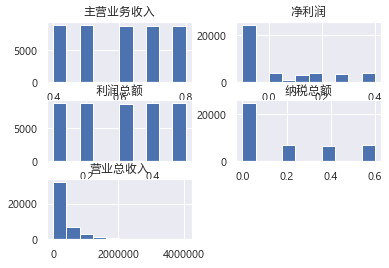

In [144]:
ratedf.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B709CC8048>,
      dtype=object)

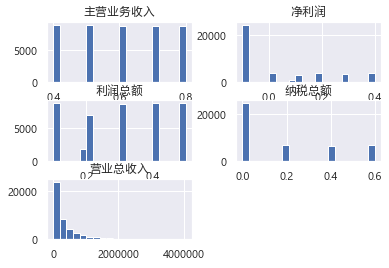

In [145]:
ratedf.hist(bins=20)

In [146]:
reportdf.dtypes

ID           int64
year       float64
从业人数       float64
资产总额       float64
负债总额       float64
营业总收入      float64
主营业务收入     float64
利润总额       float64
净利润        float64
纳税总额       float64
所有者权益合计    float64
dtype: object

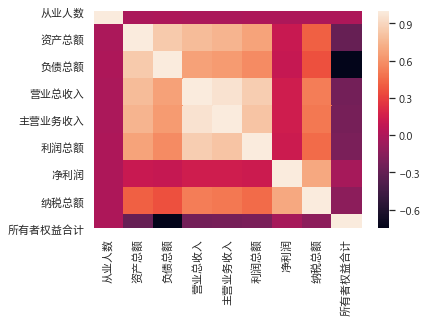

In [147]:
sns.heatmap(reportdf.iloc[:, 2:].corr())

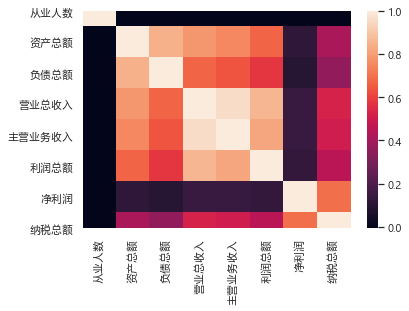

In [148]:
sns.heatmap(reportdf.iloc[:, 2:-1].corr())

In [149]:
reportdf[reportdf.资产.isnull()]

AttributeError: 'DataFrame' object has no attribute '资产'

In [150]:
reportdf[reportdf.资产总额.isnull()]

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
6,1137,2015.0,289.0,NaN,40320.0,81536.0,57075.2,32614.4,-8153.6,0.0,-11200.0
305,8663,2017.0,817.0,NaN,19780.0,101200.0,60720.0,20240.0,-10120.0,0.0,20700.0
408,30302,2015.0,235.0,NaN,232185.0,662232.0,463562.4,66223.2,-66223.2,0.0,-70665.0
473,42114,2015.0,526.0,NaN,39040.0,245830.0,172081.0,49166.0,-24583.0,0.0,40260.0
482,45362,2015.0,570.0,NaN,134815.0,1179060.0,943248.0,471624.0,-117906.0,0.0,139385.0
...,...,...,...,...,...,...,...,...,...,...,...
44555,5977437,2017.0,482.0,NaN,12320.0,20328.0,10164.0,6098.4,0.0,4065.6,6160.0
44566,5977448,2017.0,544.0,NaN,51840.0,218880.0,153216.0,21888.0,65664.0,131328.0,5760.0
44625,5977507,2017.0,211.0,NaN,49815.0,NaN,5510.4,4132.8,0.0,2755.2,-15375.0
44991,5977875,2017.0,297.0,NaN,77680.0,288387.0,201870.9,144193.5,86516.1,57677.4,9710.0


C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([21581., 10347.,  5386.,  3196.,  1868.,  1160.,   626.,   323.,
          165.,    35.]),
 array([1.90000e+02, 8.49160e+04, 1.69642e+05, 2.54368e+05, 3.39094e+05,
        4.23820e+05, 5.08546e+05, 5.93272e+05, 6.77998e+05, 7.62724e+05,
        8.47450e+05]),
 <a list of 10 Patch objects>)

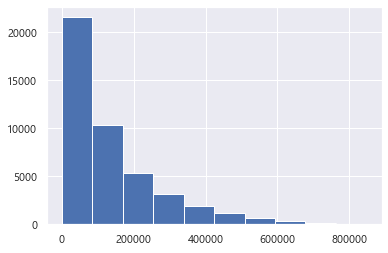

In [151]:
plt.hist(reportdf.资产总额)

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([5.534e+03, 5.085e+03, 4.277e+03, 3.521e+03, 3.164e+03, 2.748e+03,
        2.323e+03, 2.012e+03, 1.753e+03, 1.511e+03, 1.294e+03, 1.202e+03,
        1.050e+03, 1.031e+03, 8.090e+02, 7.910e+02, 7.000e+02, 6.170e+02,
        5.700e+02, 5.180e+02, 4.430e+02, 3.910e+02, 3.890e+02, 3.460e+02,
        2.990e+02, 3.000e+02, 2.500e+02, 2.390e+02, 1.920e+02, 1.790e+02,
        1.430e+02, 1.520e+02, 1.250e+02, 1.070e+02, 9.900e+01, 8.400e+01,
        8.200e+01, 6.400e+01, 4.900e+01, 4.400e+01, 4.900e+01, 3.700e+01,
        2.400e+01, 3.600e+01, 1.900e+01, 1.100e+01, 1.400e+01, 1.000e+00,
        5.000e+00, 4.000e+00]),
 array([1.900000e+02, 1.713520e+04, 3.408040e+04, 5.102560e+04,
        6.797080e+04, 8.491600e+04, 1.018612e+05, 1.188064e+05,
        1.357516e+05, 1.526968e+05, 1.696420e+05, 1.865872e+05,
        2.035324e+05, 2.204776e+05, 2.374228e+05, 2.543680e+05,
        2.713132e+05, 2.882584e+05, 3.052036e+05, 3.221488e+05,
        3.390940e+05, 3.560392e+05, 3.729844e+05, 3.8992

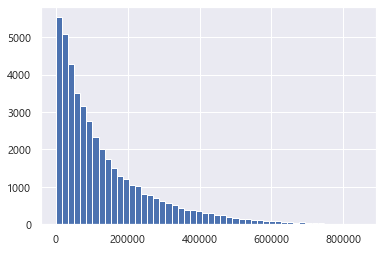

In [152]:
plt.hist(reportdf.资产总额, bins=50)

In [153]:
reportdf.资产总额.mean()

135728.099894824

In [154]:
reportdf.资产总额.median()

89250.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7099A1780>,
      dtype=object)

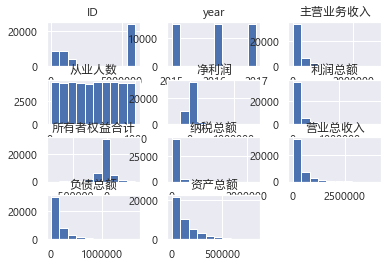

In [155]:
reportdf.hist()

In [156]:
r = reportdf['负债总额']/reportdf['资产总额']
i = (0.5 - r[r<=0.5]).value_counts().sort_index().index

In [157]:
for f in i.to_list():
    print(Fraction(2*f).limit_denominator(1000))

0
1/85
1/80
1/75
1/70
1/68
1/65
1/64
1/60
1/56
1/55
1/52
1/51
1/50
1/48
1/45
1/44
1/42
1/40
1/39
1/36
1/35
1/34
1/33
1/32
1/30
1/28
1/27
1/26
1/25
1/24
1/22
1/21
1/20
1/18
1/17
1/16
1/15
1/14
1/13
1/12
1/11
1/10
1/9
1/8
1/7
1/6
1/5
1/4
1/3
1/2
1


C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  200.,   643., 10504.,   635., 10520.,   661.,  2679.,  8023.,
         1428.,  8949.]),
 array([0.        , 0.19764706, 0.39529412, 0.59294118, 0.79058824,
        0.98823529, 1.18588235, 1.38352941, 1.58117647, 1.77882353,
        1.97647059]),
 <a list of 10 Patch objects>)

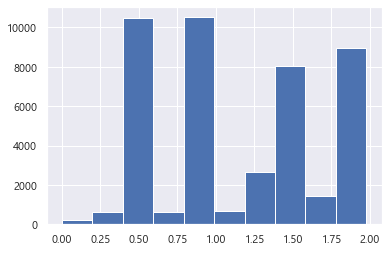

In [158]:
plt.hist(r)

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  155.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  214.,    0.,    0.,
           0.,  274.,    0.,    0.,  186.,    0.,  382.,  153.,  629.,
         525., 1072., 1123., 2341., 3927.,  166.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  199.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  436.,    0.,    0.,    0.,    0.,  196.,
           0.,    0.,    0.,  385.,    0.,  158.,    0.,  367.,  300.,
           0.,  517.,  658.,  465.,  800.,  372., 1156., 1250., 1976.,
        1920.,   46.,  331.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  284.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  186.,    0.,    0.,    0.,    0.,
      

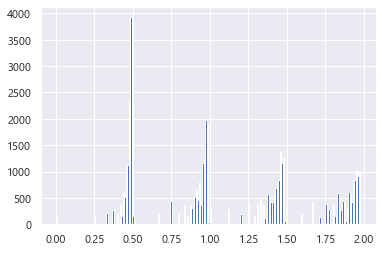

In [159]:
plt.hist(r, bins=200)

(array([ 200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  155.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  214.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  274.,    0.,    0.,    0.,    0.,  186.,
           0.,    0.,  382.,    0.,  153.,    0.,  366.,  263.,    0.,
         525.,  610.,  462.,  785.,  743.,  712., 1632., 1809., 1755.,
         121.]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.1

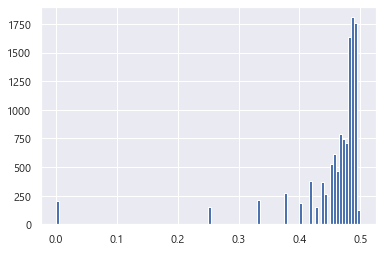

In [160]:
plt.hist(r[r<=0.5], bins=100)

In [161]:
r[r<=0.5].value_counts()

0.458333    610
0.483333    467
0.479167    446
0.466667    417
0.475000    405
0.416667    382
0.450000    377
0.468750    368
0.437500    366
0.464286    322
0.487500    320
0.488889    310
0.482143    309
0.491667    302
0.472222    300
0.486111    277
0.375000    274
0.484375    267
0.444444    263
0.489583    244
0.333333    214
0.000000    200
0.400000    186
0.492308    165
0.491071    164
0.487179    163
0.490385    162
0.490000    161
0.493333    160
0.488095    158
0.481481    156
0.250000    155
0.485714    154
0.492857    154
0.428571    153
0.480000    150
0.454545    148
0.490909    145
0.480769    142
0.484848    141
0.461538    140
0.477273    137
0.488636    136
0.476190    129
0.500000    121
0.492188    104
0.493750    101
0.492647     52
0.485294     47
0.494118     45
0.490196     40
0.470588     38
dtype: int64

In [162]:
c = (0.5 - r[r<=0.5]).value_counts().sort_index()
for i, v in c.items():
    print(Fraction(2*f).limit_denominator(1000), v)

1 121
1 45
1 101
1 160
1 154
1 52
1 165
1 104
1 302
1 164
1 145
1 162
1 40
1 161
1 244
1 310
1 136
1 158
1 320
1 163
1 277
1 154
1 47
1 141
1 267
1 467
1 309
1 156
1 142
1 150
1 446
1 137
1 129
1 405
1 300
1 38
1 368
1 417
1 322
1 140
1 610
1 148
1 377
1 263
1 366
1 153
1 382
1 186
1 274
1 214
1 155
1 200


In [163]:
c

0.000000    121
0.005882     45
0.006250    101
0.006667    160
0.007143    154
0.007353     52
0.007692    165
0.007812    104
0.008333    302
0.008929    164
0.009091    145
0.009615    162
0.009804     40
0.010000    161
0.010417    244
0.011111    310
0.011364    136
0.011905    158
0.012500    320
0.012821    163
0.013889    277
0.014286    154
0.014706     47
0.015152    141
0.015625    267
0.016667    467
0.017857    309
0.018519    156
0.019231    142
0.020000    150
0.020833    446
0.022727    137
0.023810    129
0.025000    405
0.027778    300
0.029412     38
0.031250    368
0.033333    417
0.035714    322
0.038462    140
0.041667    610
0.045455    148
0.050000    377
0.055556    263
0.062500    366
0.071429    153
0.083333    382
0.100000    186
0.125000    274
0.166667    214
0.250000    155
0.500000    200
dtype: int64

In [164]:
c = (0.5 - r[r<=0.5]).value_counts().sort_index()
for i, v in c.items():
    print(Fraction(2*i).limit_denominator(1000), v)

0 121
1/85 45
1/80 101
1/75 160
1/70 154
1/68 52
1/65 165
1/64 104
1/60 302
1/56 164
1/55 145
1/52 162
1/51 40
1/50 161
1/48 244
1/45 310
1/44 136
1/42 158
1/40 320
1/39 163
1/36 277
1/35 154
1/34 47
1/33 141
1/32 267
1/30 467
1/28 309
1/27 156
1/26 142
1/25 150
1/24 446
1/22 137
1/21 129
1/20 405
1/18 300
1/17 38
1/16 368
1/15 417
1/14 322
1/13 140
1/12 610
1/11 148
1/10 377
1/9 263
1/8 366
1/7 153
1/6 382
1/5 186
1/4 274
1/3 214
1/2 155
1 200


C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  200.,   643., 10504.,   635., 10520.,   661.,  2679.,  8023.,
         1428.,  8949.]),
 array([0.        , 0.19764706, 0.39529412, 0.59294118, 0.79058824,
        0.98823529, 1.18588235, 1.38352941, 1.58117647, 1.77882353,
        1.97647059]),
 <a list of 10 Patch objects>)

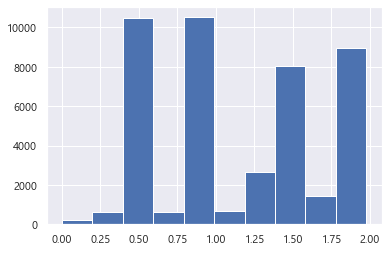

In [165]:
plt.hist(r)

In [166]:
ratedf

,营业总收入,主营业务收入,利润总额,净利润,纳税总额
0,72160.0,0.4,0.1,-0.1,0.0
1,115248.0,0.5,0.5,-0.1,0.0
2,502840.0,0.7,NaN,-0.1,0.0
3,655424.0,0.4,0.3,-0.1,0.0
4,402864.0,0.7,0.4,-0.1,0.0
...,...,...,...,...,...
45145,3726.0,0.5,0.2,0.1,0.6
45146,260832.0,0.8,0.3,-0.1,0.0
45147,106596.0,0.4,0.1,-0.1,0.0
45148,421776.0,0.6,0.4,-0.1,0.0


In [167]:
ratedf['资产总额'] = reportdf['资产总额']
ratedf['负债总额'] = reportdf['负债总额'] / reportdf['资产总额']

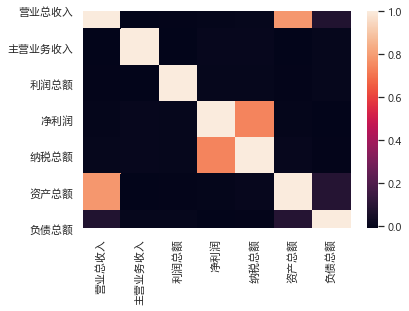

In [168]:
sns.heatmap(ratedf.corr())

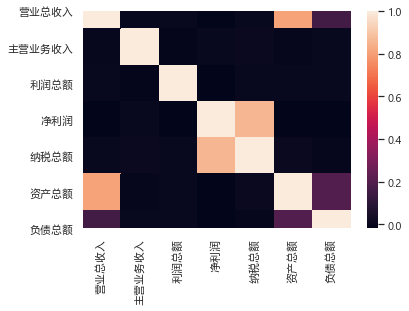

In [169]:
sns.heatmap(ratedf.corr(method='spearman'))

C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 200.,    0.,    0.,    0.,    0.,    0.,  155.,    0.,  214.,
         274.,  721., 3349., 6434.,    0.,    0.,    0.,  199.,    0.,
         436.,    0.,  196.,  543., 1184., 2295., 6302.,  377.,    0.,
           0.,  284.,    0.,  186.,  384.,  159.,  899., 1051., 1580.,
        3646., 2797.,    0.,    0.,  197.,    0.,  415.,  136.,  680.,
         522., 1010., 1200., 2415., 3802.]),
 array([0.        , 0.03952941, 0.07905882, 0.11858824, 0.15811765,
        0.19764706, 0.23717647, 0.27670588, 0.31623529, 0.35576471,
        0.39529412, 0.43482353, 0.47435294, 0.51388235, 0.55341176,
        0.59294118, 0.63247059, 0.672     , 0.71152941, 0.75105882,
        0.79058824, 0.83011765, 0.86964706, 0.90917647, 0.94870588,
        0.98823529, 1.02776471, 1.06729412, 1.10682353, 1.14635294,
        1.18588235, 1.22541176, 1.26494118, 1.30447059, 1.344     ,
        1.38352941, 1.42305882, 1.46258824, 1.50211765, 1.54164706,
        1.58117647, 1.62070588, 1.66023529, 1.69976471, 

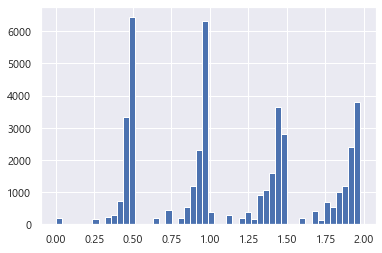

In [170]:
plt.hist(r, bins=50)

In [171]:
c = (0.5 - r[r<=0.5]).value_counts().sort_index()
for i, v in c.items():
    print(Fraction(2*i).limit_denominator(1000), v)

0 121
1/85 45
1/80 101
1/75 160
1/70 154
1/68 52
1/65 165
1/64 104
1/60 302
1/56 164
1/55 145
1/52 162
1/51 40
1/50 161
1/48 244
1/45 310
1/44 136
1/42 158
1/40 320
1/39 163
1/36 277
1/35 154
1/34 47
1/33 141
1/32 267
1/30 467
1/28 309
1/27 156
1/26 142
1/25 150
1/24 446
1/22 137
1/21 129
1/20 405
1/18 300
1/17 38
1/16 368
1/15 417
1/14 322
1/13 140
1/12 610
1/11 148
1/10 377
1/9 263
1/8 366
1/7 153
1/6 382
1/5 186
1/4 274
1/3 214
1/2 155
1 200


In [172]:
c = (0.5 - r[r<=0.5]).value_counts().sort_index()
for i, v in c.items():
    print(Fraction(i).limit_denominator(1000), v)

0 121
1/170 45
1/160 101
1/150 160
1/140 154
1/136 52
1/130 165
1/128 104
1/120 302
1/112 164
1/110 145
1/104 162
1/102 40
1/100 161
1/96 244
1/90 310
1/88 136
1/84 158
1/80 320
1/78 163
1/72 277
1/70 154
1/68 47
1/66 141
1/64 267
1/60 467
1/56 309
1/54 156
1/52 142
1/50 150
1/48 446
1/44 137
1/42 129
1/40 405
1/36 300
1/34 38
1/32 368
1/30 417
1/28 322
1/26 140
1/24 610
1/22 148
1/20 377
1/18 263
1/16 366
1/14 153
1/12 382
1/10 186
1/8 274
1/6 214
1/4 155
1/2 200


In [173]:
i = r.index.to_numpy()/4

In [174]:
i

array([0.000000e+00, 2.500000e-01, 5.000000e-01, ..., 1.128675e+04,
       1.128700e+04, 1.128725e+04])

In [175]:
for i in r.index.to_numpy()/2:
    print(Fraction(2*i).limit_denominator(1000), v)

0
43150 200
43151 200
43152 200
43153 200
43154 200
43155 200
43156 200
43157 200
43158 200
43159 200
43160 200
43161 200
43162 200
43163 200
43164 200
43165 200
43166 200
43167 200
43168 200
43169 200
43170 200
43171 200
43172 200
43173 200
43174 200
43175 200
43176 200
43177 200
43178 200
43179 200
43180 200
43181 200
43182 200
43183 200
43184 200
43185 200
43186 200
43187 200
43188 200
43189 200
43190 200
43191 200
43192 200
43193 200
43194 200
43195 200
43196 200
43197 200
43198 200
43199 200
43200 200
43201 200
43202 200
43203 200
43204 200
43205 200
43206 200
43207 200
43208 200
43209 200
43210 200
43211 200
43212 200
43213 200
43214 200
43215 200
43216 200
43217 200
43218 200
43219 200
43220 200
43221 200
43222 200
43223 200
43224 200
43225 200
43226 200
43227 200
43228 200
43229 200
43230 200
43231 200
43232 200
43233 200
43234 200
43235 200
43236 200
43237 200
43238 200
43239 200
43240 200
43241 200
43242 200
43243 200
43244 200
43245 200
43246 200
43247 200
43248 200
43249 20

In [176]:
r.index/2

Float64Index([    0.0,     0.5,     1.0,     1.5,     2.0,     2.5,     3.0,
                  3.5,     4.0,     4.5,
              ...
              22570.0, 22570.5, 22571.0, 22571.5, 22572.0, 22572.5, 22573.0,
              22573.5, 22574.0, 22574.5],
             dtype='float64', length=45150)

In [177]:
r

0        1.750000
1        0.428571
2        0.950000
3        0.937500
4        1.464286
           ...   
45145    1.333333
45146    0.980769
45147    1.925926
45148    1.437500
45149    1.866667
Length: 45150, dtype: float64

In [178]:
r.value_counts.sort_index.index

AttributeError: 'function' object has no attribute 'sort_index'

In [179]:
r.value_counts.sort_index().index

AttributeError: 'function' object has no attribute 'sort_index'

In [180]:
r.value_counts().sort_index().index

Float64Index([                0.0,                0.25,  0.3333333333333333,
                            0.375,                 0.4,  0.4166666666666667,
              0.42857142857142855,              0.4375,  0.4444444444444444,
                             0.45,
              ...
               1.9636363636363636,  1.9642857142857142,  1.9666666666666666,
                          1.96875,  1.9692307692307693,  1.9705882352941178,
               1.9714285714285715,  1.9733333333333334,               1.975,
               1.9764705882352942],
             dtype='float64', length=198)

In [181]:
r.value_counts().sort_index().index/2

Float64Index([                0.0,               0.125, 0.16666666666666666,
                           0.1875,                 0.2, 0.20833333333333334,
              0.21428571428571427,             0.21875,  0.2222222222222222,
                            0.225,
              ...
               0.9818181818181818,  0.9821428571428571,  0.9833333333333333,
                         0.984375,  0.9846153846153847,  0.9852941176470589,
               0.9857142857142858,  0.9866666666666667,              0.9875,
               0.9882352941176471],
             dtype='float64', length=198)

In [182]:
hist(r.value_counts().sort_index().index/2, bins=50)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  3., 11., 34.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  2.,  4.,  7., 32.,  2.,
         0.,  0.,  1.,  0.,  1.,  1.,  1.,  2.,  3.,  6., 16., 18.,  0.,
         0.,  1.,  0.,  1.,  1.,  2.,  2.,  3.,  4.,  9., 24.]),
 array([0.        , 0.01976471, 0.03952941, 0.05929412, 0.07905882,
        0.09882353, 0.11858824, 0.13835294, 0.15811765, 0.17788235,
        0.19764706, 0.21741176, 0.23717647, 0.25694118, 0.27670588,
        0.29647059, 0.31623529, 0.336     , 0.35576471, 0.37552941,
        0.39529412, 0.41505882, 0.43482353, 0.45458824, 0.47435294,
        0.49411765, 0.51388235, 0.53364706, 0.55341176, 0.57317647,
        0.59294118, 0.61270588, 0.63247059, 0.65223529, 0.672     ,
        0.69176471, 0.71152941, 0.73129412, 0.75105882, 0.77082353,
        0.79058824, 0.81035294, 0.83011765, 0.84988235, 0.86964706,
        0.88941176, 0.90917647, 0.92894118, 0.94870588, 0.96847059,
        0.98823529]),
 <a list of 50

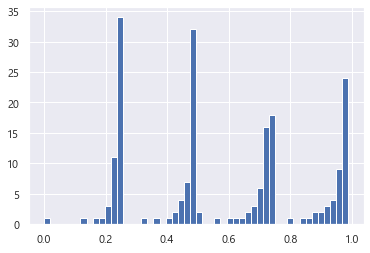

In [183]:
plt.hist(r.value_counts().sort_index().index/2, bins=50)

In [184]:
for f in (r.value_counts().sort_index().index/2).to_list():
    print(Fraction(f).limit_denominator(1000))

0
1/8
1/6
3/16
1/5
5/24
3/14
7/32
2/9
9/40
5/22
11/48
3/13
13/56
7/30
15/64
4/17
17/72
19/80
5/21
21/88
23/96
6/25
25/104
13/54
27/112
29/120
31/128
8/33
33/136
17/70
35/144
19/78
39/160
41/168
43/176
11/45
47/192
49/200
25/102
51/208
27/110
55/224
59/240
63/256
16/65
67/272
69/280
37/150
79/320
21/85
1/4
1/3
3/8
2/5
5/12
3/7
7/16
4/9
9/20
5/11
11/24
6/13
13/28
7/15
15/32
8/17
17/36
19/40
10/21
21/44
23/48
12/25
25/52
13/27
27/56
29/60
31/64
16/33
33/68
17/35
35/72
19/39
39/80
41/84
43/88
22/45
47/96
49/100
25/51
51/104
27/55
55/112
59/120
63/128
32/65
67/136
69/140
37/75
79/160
42/85
1/2
9/16
3/5
5/8
9/14
21/32
2/3
27/40
15/22
11/16
9/13
39/56
7/10
45/64
12/17
17/24
57/80
5/7
63/88
23/32
18/25
75/104
13/18
81/112
29/40
93/128
8/11
99/136
51/70
35/48
19/26
117/160
41/56
129/176
11/15
47/64
147/200
25/34
153/208
81/110
165/224
59/80
189/256
48/65
201/272
207/280
37/50
237/320
63/85
3/4
4/5
5/6
6/7
7/8
8/9
9/10
10/11
11/12
12/13
13/14
14/15
15/16
16/17
17/18
19/20
20/21
21/22
23/24
24/25

In [185]:
r[r>1.5].value_counts()

1.833333    590
1.900000    455
1.933333    450
1.916667    450
1.866667    434
1.875000    420
1.666667    415
1.750000    393
1.800000    370
1.928571    334
1.955556    325
1.950000    293
1.888889    292
1.777778    287
1.966667    280
1.857143    273
1.958333    249
1.944444    249
1.937500    241
1.600000    197
1.961538    160
1.963636    160
1.973333    159
1.909091    157
1.925926    154
1.939394    153
1.818182    152
1.904762    151
1.942857    151
1.960000    151
1.954545    150
1.846154    147
1.969231    144
1.964286    141
1.952381    140
1.923077    140
1.714286    136
1.971429    131
1.920000    124
1.948718    122
1.975000    105
1.968750     88
1.960784     64
1.882353     54
1.970588     54
1.941176     47
1.976471     45
dtype: int64

In [186]:
r.median()

0.9857142857142858

In [187]:
reportdf.dtypes

ID           int64
year       float64
从业人数       float64
资产总额       float64
负债总额       float64
营业总收入      float64
主营业务收入     float64
利润总额       float64
净利润        float64
纳税总额       float64
所有者权益合计    float64
dtype: object

In [188]:
reportdf.iloc[:, 6:]/reportdf.iloc[:, 5]

MemoryError: Unable to allocate array with shape (45150, 45150) and data type float64

In [189]:
ratedf

,营业总收入,主营业务收入,利润总额,净利润,纳税总额,资产总额,负债总额
0,72160.0,0.4,0.1,-0.1,0.0,16400.0,1.750000
1,115248.0,0.5,0.5,-0.1,0.0,23520.0,0.428571
2,502840.0,0.7,NaN,-0.1,0.0,193400.0,0.950000
3,655424.0,0.4,0.3,-0.1,0.0,133760.0,0.937500
4,402864.0,0.7,0.4,-0.1,0.0,366240.0,1.464286
...,...,...,...,...,...,...,...
45145,3726.0,0.5,0.2,0.1,0.6,1380.0,1.333333
45146,260832.0,0.8,0.3,-0.1,0.0,59280.0,0.980769
45147,106596.0,0.4,0.1,-0.1,0.0,88830.0,1.925926
45148,421776.0,0.6,0.4,-0.1,0.0,145440.0,1.437500


In [190]:
ratedf[:,1] * reportdf['营业总收入']

TypeError: '(slice(None, None, None), 1)' is an invalid key

In [191]:
ratedf[:,1].mul(reportdf['营业总收入'])

TypeError: '(slice(None, None, None), 1)' is an invalid key

In [192]:
capitalRate = reportdf['负债总额']/reportdf['资产总额']

In [193]:
capitalRate = reportdf['负债总额'].div(reportdf['资产总额'])

In [194]:
capitalRate.fillna(capitalRate.median()) * reportdf['资产总额']

0         28700.0
1         10080.0
2        183730.0
3        125400.0
4        536280.0
           ...   
45145      1840.0
45146     58140.0
45147    171080.0
45148    209070.0
45149    194880.0
Length: 45150, dtype: float64

In [195]:
 reportdf.iloc[:, 6:].div(reportdf['营业总收入'])

MemoryError: Unable to allocate array with shape (45150, 45150) and data type float64

In [196]:
reportdf.iloc[:, 6:].div(reportdf['营业总收入'], axis=0)

,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
0,0.4,0.1,-0.1,0.0,-0.170455
1,0.5,0.5,-0.1,0.0,0.116618
2,0.7,NaN,-0.1,0.0,0.019231
3,0.4,0.3,-0.1,0.0,0.012755
4,0.7,0.4,-0.1,0.0,-0.422078
...,...,...,...,...,...
45145,0.5,0.2,0.1,0.6,-0.123457
45146,0.8,0.3,-0.1,0.0,0.004371
45147,0.4,0.1,-0.1,0.0,-0.771605
45148,0.6,0.4,-0.1,0.0,-0.150862
